# 유튜브 댓글 수집 및 시각화 실습

## 1.데이터 준비하기

### 패키지 설치 및 임포트

In [1]:
!pip install konlpy
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import konlpy

import matplotlib.pyplot as plt
import plotly.express as px
import koreanize_matplotlib

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
youtube_df = pd.read_csv('/content/유튜브댓글_크롤링_20240709.csv')
youtube_df

,댓글 내용
0,잘 정리하셨네유 재밌게 잘 봤습니당
1,다 좋은데 브금 시끄러워 보다가 말았음. 내용 좋은데 정신없음..
2,가끔 해리포터의 감성이 그리울 때가 있어요 특히 이렇게 찬바람이 쌩쌩 불기 시작한 ...
3,2:42 알고보면 슬리데린처럼 교복(?) 이쁘게 잘 챙겨입는 기숙사가 없음
4,와 해리포터 다 봤다~요약 짱 재밌게 봤어요
...,...
184,브금시바라
185,2:06 역무원은 마법사입니다. 원래 자막에는 머글들이라고 비아냥대는데 잘알지도 못...
186,이름들 발음못하는거 개웃기네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
187,해리 부모님이 뭔 보호마법 걸었으니까 무슨전투를 해도 다̆̈ 이길 수 잇는거 아니에요?


## 2.단어분석

In [7]:
okt = konlpy.tag.Okt()
word_df = pd.DataFrame({'word' : okt.nouns(' '.join(li for li in youtube_df['댓글 내용'].astype(str)))})
word_df

,word
0,정리
1,유
2,습
3,브금
4,내용
...,...
991,둥탁
992,브금
993,왜
994,도대체


In [8]:
word_df['count'] = word_df['word'].str.len()
word_df

,word,count
0,정리,2
1,유,1
2,습,1
3,브금,2
4,내용,2
...,...,...
991,둥탁,2
992,브금,2
993,왜,1
994,도대체,3


### 단어 집계표 만들기

In [10]:
group_df = word_df.groupby('word', as_index=False).agg(n=('word', 'count')).sort_values('n', ascending=False)
group_df

,word,n
214,브금,34
514,해리포터,20
183,배경음악,16
513,해리,15
110,때문,13
...,...,...
220,빠,1
218,비호감,1
216,비아,1
213,브,1


### 단어 집계 결과 시각화

In [11]:
px.bar(group_df.head(20), x='word', y='n', text_auto=True)

## 3.워드클라우드 시각화

### 명사 집계표를 활용한 워드 클라우드 시각화

In [12]:
dic_word = group_df.set_index('word').to_dict()['n']
dic_word

{'브금': 34,
 '해리포터': 20,
 '배경음악': 16,
 '해리': 15,
 '때문': 13,
 '요약': 13,
 '음악': 12,
 '영상': 12,
 '마법사': 11,
 '집중': 10,
 '왜': 9,
 '소리': 9,
 '진짜': 9,
 '뭐': 8,
 '노래': 8,
 '좀': 8,
 '때': 7,
 '마법': 7,
 '개': 7,
 '배경음': 6,
 '비트': 6,
 '볼드모트': 6,
 '다시': 6,
 '말': 6,
 '죽음': 6,
 '이해': 5,
 '정신': 5,
 '내용': 5,
 '물': 5,
 '하나': 5,
 '더': 5,
 '요': 5,
 '슬리데린': 5,
 '영화': 5,
 '발음': 5,
 '뭐임': 4,
 '것': 4,
 '아이': 4,
 '이프': 4,
 '돌': 4,
 '학교': 4,
 '거': 4,
 '그리핀도르': 4,
 '난': 4,
 '덤블도어': 4,
 '머리': 4,
 '포터': 4,
 '불의': 3,
 '스': 3,
 '땜': 3,
 '이': 3,
 '디멘터': 3,
 '마지막': 3,
 '래번클로': 3,
 '커서': 3,
 '리': 3,
 '리뷰': 3,
 '정리': 3,
 '자막': 3,
 '잔': 3,
 '재미': 3,
 '사람': 3,
 '중': 3,
 '방': 3,
 '방해': 3,
 '배경': 3,
 '번': 3,
 '보고': 3,
 '위즐리': 3,
 '딕션': 3,
 '여기': 3,
 '나': 3,
 '호그와트': 3,
 '그': 3,
 '왕자': 3,
 '함': 3,
 '후플푸프': 3,
 '혼혈': 3,
 '못': 2,
 '소망': 2,
 '빨': 2,
 '죄수': 2,
 '센스': 2,
 '후': 2,
 '해': 2,
 '기사단': 2,
 '왕': 2,
 '카': 2,
 '저': 2,
 '감성': 2,
 '안': 2,
 '론': 2,
 '수': 2,
 '볼라': 2,
 '와우': 2,
 '주행': 2,
 '머': 2,
 '이상': 2,
 '고생': 2,
 '바': 2,
 

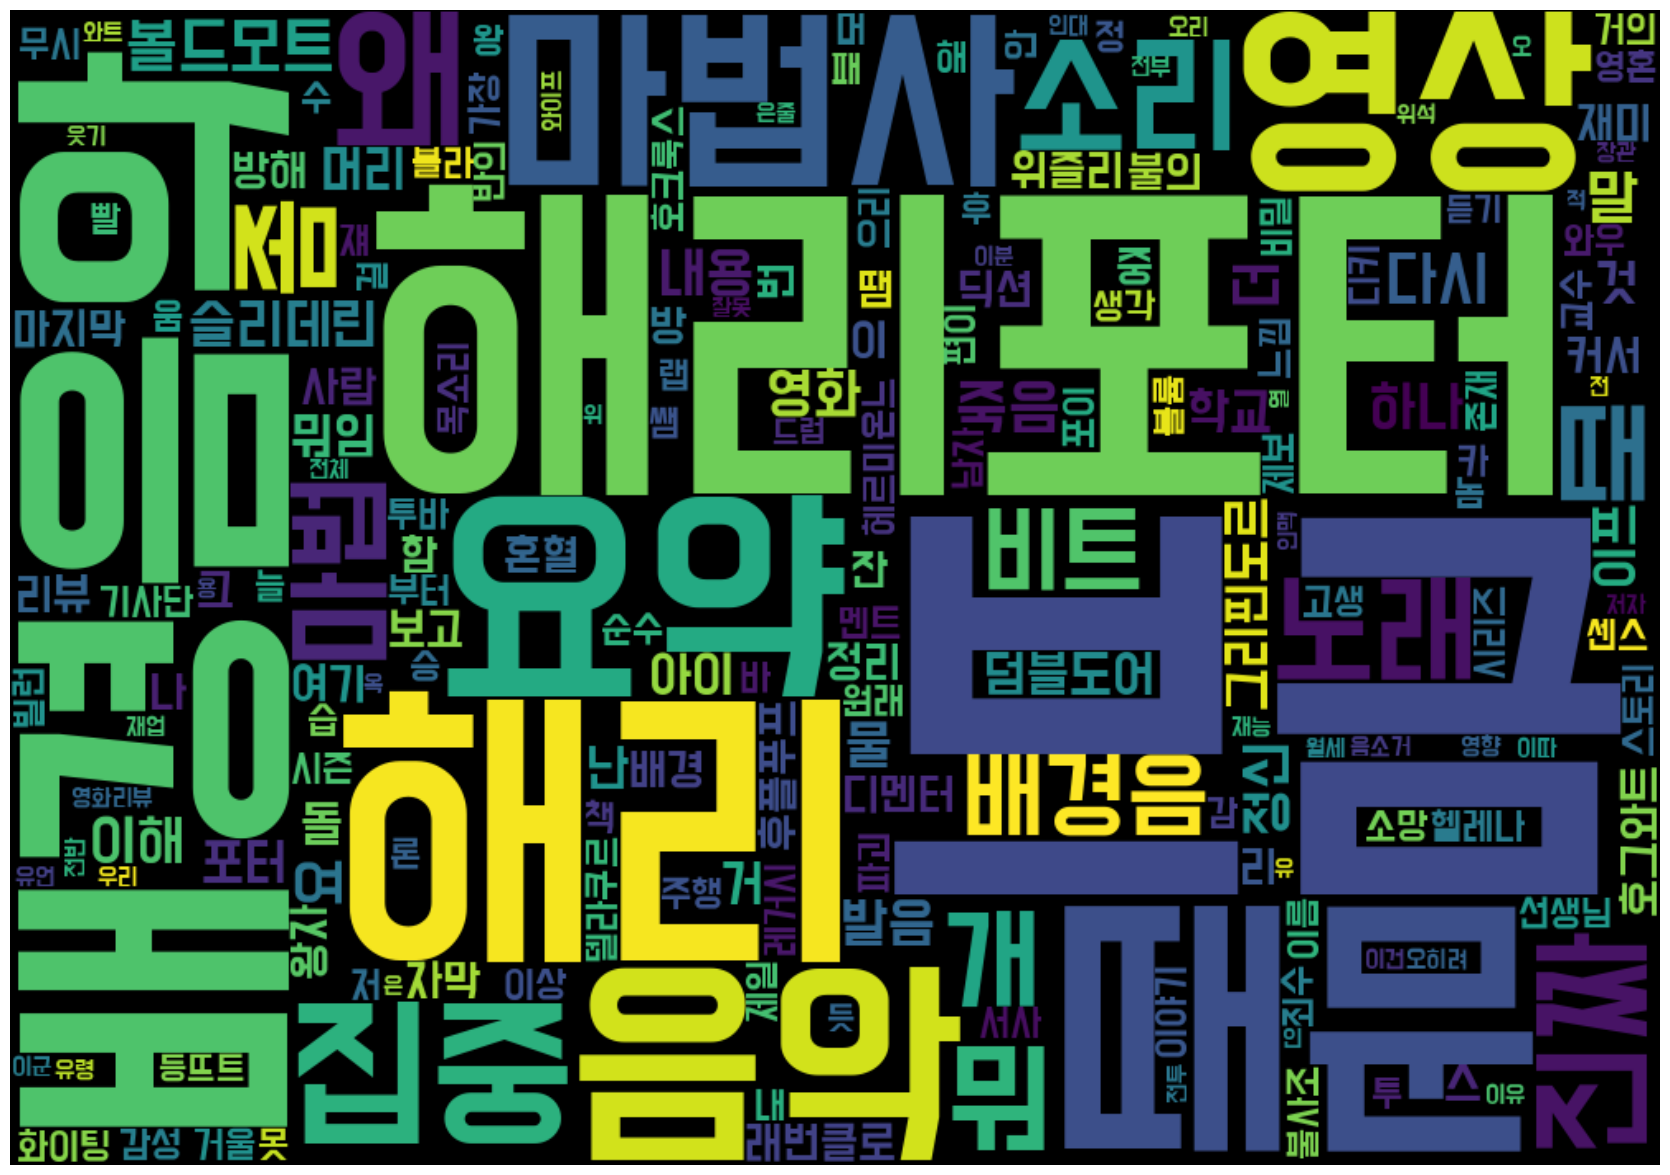

In [15]:
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))
wc = WordCloud(width=1000, height=700, font_path=font_path).generate_from_frequencies(dic_word)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

### 마스킹을 활용한 워드 클라우드 시각화

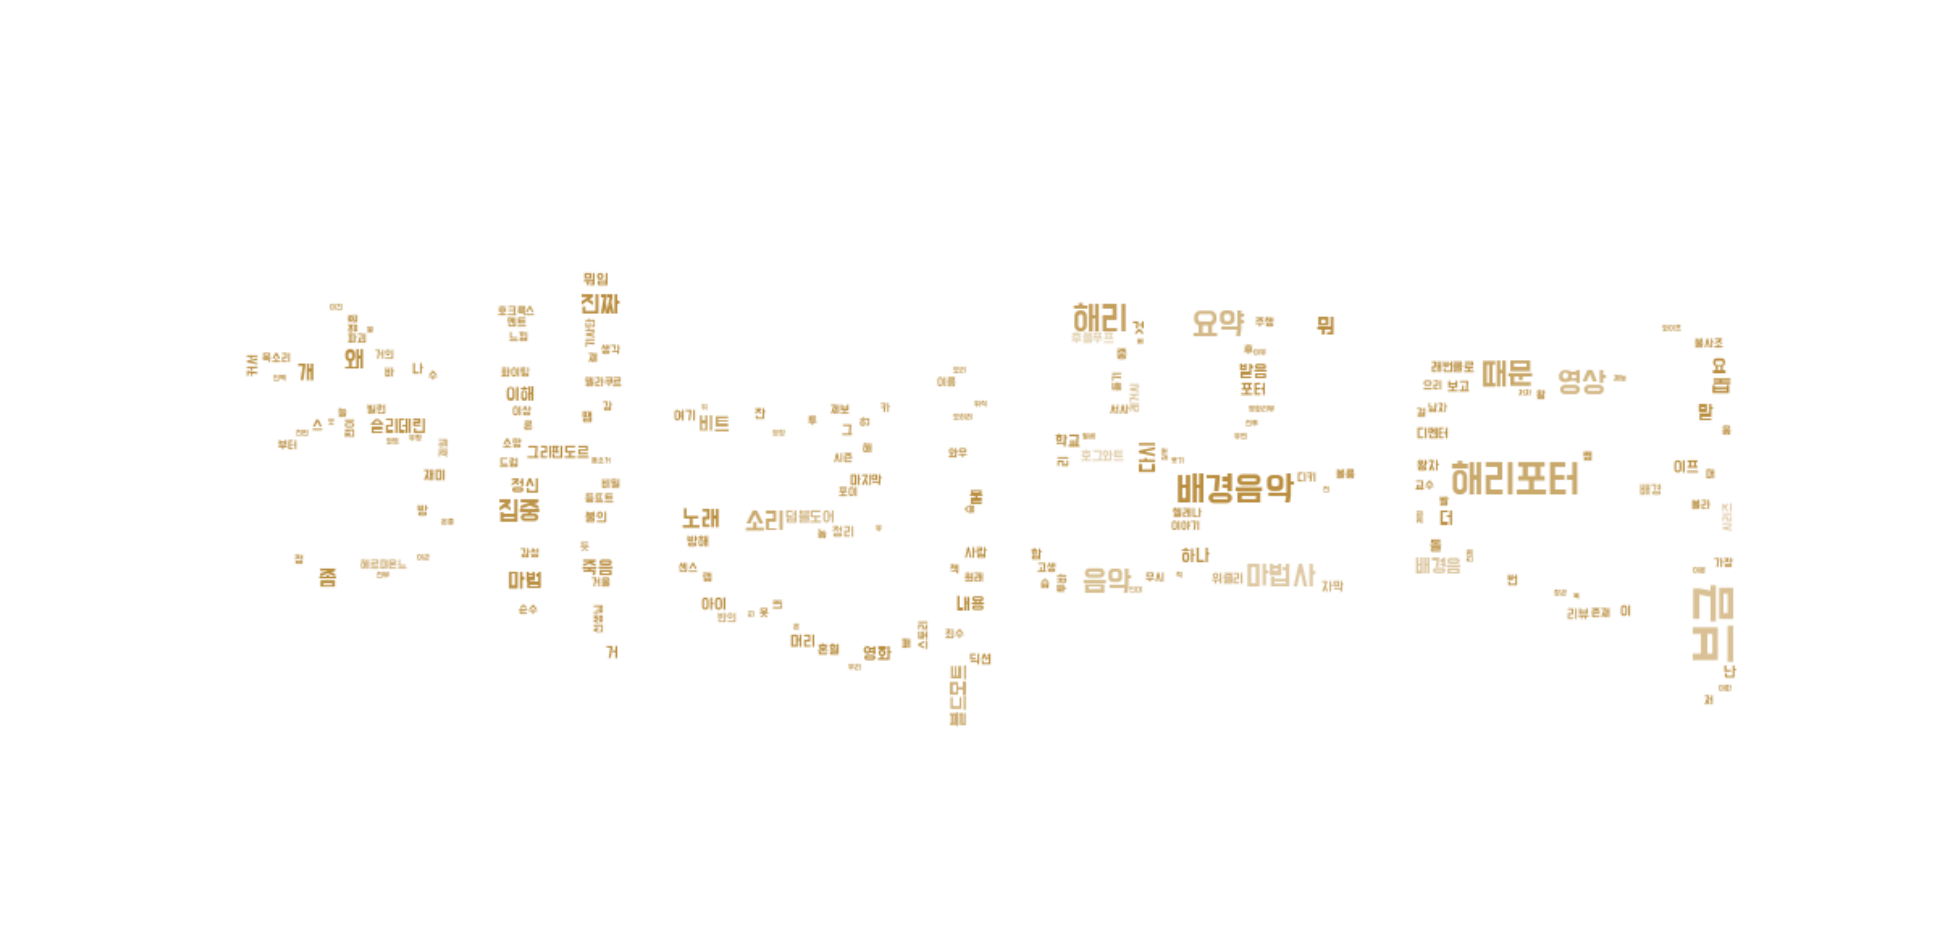

In [18]:
icon = Image.open('/content/harry.png')
harry_mask = np.array(icon)

plt.subplots(figsize=(25,15))
wc = WordCloud(width=1000, height=700, background_color='white', font_path=font_path, mask=harry_mask).generate_from_frequencies(dic_word)

plt.axis('off')
img_colors = ImageColorGenerator(harry_mask, default_color=(255,255,255))
wc = wc.recolor(color_func=img_colors)
plt.imshow(wc, interpolation='bilinear')
plt.show()

### 이미지 결과 저장

In [19]:
wc.to_file(filename='harry_wordcloud.png')
print('이미지 저장 완료')

이미지 저장 완료
